In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

1. Merge the twelve dataframes, spanning from January to December for both specified years, into a single dataframe. Then, display the total dimensions (shape) of the resulting combined dataframe.

In [2]:


def combine_csv_files(folder_path):
    """
    Combine multiple CSV files in a given folder into a single DataFrame.

    Parameters:
    - folder_path (str): The path to the folder containing CSV files.

    Returns:
    - pd.DataFrame: Combined DataFrame.
    """
    # Get the list of CSV file names in the folder
    file_pattern = '*.csv'
    file_names = glob.glob(folder_path + file_pattern)

    # List to store DataFrames
    df_list = []

    # Read each CSV file and append its DataFrame to the list
    for file_name in file_names:
        df = pd.read_csv(file_name, delimiter=';', encoding='latin-1')
        df_list.append(df)

    # Concatenate the DataFrames into a single DataFrame
    df_combined = pd.concat(df_list, ignore_index=True)

    return df_combined

Folder_2020 =  './Fines2020/'
Folder_2021 =  './Fines2021/'
Folder_2022 =  './Fines2022/'


df_2020 = combine_csv_files(Folder_2020)
df_2021 = combine_csv_files(Folder_2021)
df_2022 = combine_csv_files(Folder_2022)

df_con = pd.concat([df_2020, df_2022])
df_21 = pd.concat([df_2020, df_2021, df_2022])

C:\Users\deniz\AppData\Local\Temp\ipykernel_4788\1001931571.py:20: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, delimiter=';', encoding='latin-1')


In [3]:
total_shape = df_con.shape
print(f'The total shape of our dataframe is {total_shape[0]} rows, and {total_shape[1]} columns')

The total shape of our dataframe is 4695429 rows, and 18 columns


2. As we will not be working with geographic data, delete the COORDENADA-X and COORDENADA-Y columns.


In [4]:
def drop_coors(df):
    """
    Clean a DataFrame by fixing column names, removing duplicates, and dropping specified columns.

    Parameters:
    - df (pd.DataFrame): Input DataFrame to be cleaned.

    Returns:
    pd.DataFrame: Cleaned DataFrame with fixed column names, removed duplicates,
                  and specified columns dropped.
    """
    # Fix column names
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.upper()

    # Remove duplicate columns
    df = df.loc[:, ~df.columns.duplicated()]

    # Drop unwanted columns without modifying names
    columns_to_drop = ['COORDENADA_X', 'COORDENADA_Y', 'COORDENADA-X', 'COORDENADA-Y']
    df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

    return df_cleaned

df_2020 = drop_coors(df_2020)
df_2022 = drop_coors(df_2022)
df_con = drop_coors(df_con)
df_21 = drop_coors(df_21)


In [5]:
# Print the columns of the resulting DataFrame
df_con

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA
0,GRAVE,ALFONSO XII,1,2020,12.18,200.0,SI,3.0,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,,
1,GRAVE,AV BADAJOZ 5,1,2020,9.46,200.0,SI,0.0,POLICIA MUNICIPAL,ESTACIONAR EN DOBLE FILA. ...,,
2,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,13.55,90.0,SI,0.0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,
3,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,14.00,90.0,SI,0.0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,
4,LEVE,VIRGEN DE LLUC 70,1,2020,12.12,90.0,SI,0.0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA. ...,,
...,...,...,...,...,...,...,...,...,...,...,...,...
2702120,GRAVE,PO DELICIAS 68,12,2022,15.50,200.0,SI,NaN,POLICIA MUNICIPAL,PARAR EN CARRIL BICI. ...,,NaN
2702121,GRAVE,"CAMINO GANAPANES, 33",12,2022,12.40,200.0,SI,NaN,POLICIA MUNICIPAL,PARAR EN ZONA SEÑALIZADA PARA USO EXCLUSIVO DE...,,NaN
2702122,MUY GRAVE,AV ORCASUR CON CÑALBAICIN,12,2022,13.10,1000.0,SI,NaN,POLICIA MUNICIPAL,CONDUCIR CON PRESENCIA DE DROGAS EN EL ORGANIS...,,NaN
2702123,GRAVE,SINESIO DELGADO SÑN,12,2022,20.59,200.0,SI,NaN,POLICIA MUNICIPAL,CONDUCCIÓN NEGLIGENTE: CIRCULAR CAMBIANDO DE C...,,NaN


3. Examine the unique values of the variables. Some may have unique values, making them constants. Evaluate their relevance in the dataframe.


In [6]:
# Iterate over each column in the DataFrame
for column in df_con.columns:
    # Count the number of unique values in the current column
    unique_values = df_con[column].nunique()
    
    # Print a message indicating the column name and the number of unique values it has
    print(f"{column} has {unique_values} values.")
         



CALIFICACION has 3 values.
LUGAR has 166969 values.
MES has 12 values.
ANIO has 2 values.
HORA has 1440 values.
IMP_BOL has 10 values.
DESCUENTO has 2 values.
PUNTOS has 5 values.
DENUNCIANTE has 4 values.
HECHO-BOL has 2994 values.
VEL_LIMITE has 13 values.
VEL_CIRCULA has 110 values.


In [7]:

def nunique_value(df):
    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Count the number of unique values in the current column
        unique_values = df[column].nunique()
        
        # Check if the number of unique values is equal to 1
        if unique_values == 1:
            # If true, print a message indicating that the column has only one unique value
            value = print(f"{column} has only one unique value.")
        else:
            # If false, set value to 0 (this part seems unnecessary, as the variable is overwritten in each iteration)
            value = 0
    
    # Return the value (which is always the value of the last iteration, and will be 0 unless the last column has one unique value)
    return value

# Call the function for each DataFrame (df_2020, df_2022, df_con)
nun_2020 = nunique_value(df_2020)
nun_2022 = nunique_value(df_2022)
nun_con = nunique_value(df_con)


ANIO has only one unique value.
DESCUENTO has only one unique value.
ANIO has only one unique value.


In [8]:
df_2022['DESCUENTO'].value_counts()

DESCUENTO
SI    2702124
NO          1
Name: count, dtype: int64

In [9]:
df_2022[df_2022['DESCUENTO'] == 'NO']

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA
358869,LEVE,PUENTE VALLECAS CALZADA 1,2,2022,13.45,30.0,NO,0,POLICIA MUNICIPAL,CIRCULAR TRANSPORTANDO MERCANCÍAS PELIGROSAS S...,,


"We found that ANIO (year) and DESCUENTO (discount) are always constant. I'm not sure to what extent they are relevant in our DataFrame, as we know that our DataFrame already has the year classified, making the ANIO column redundant. Additionally, the DESCUENTO column seems not to vary, except for an outlier we found in the 2022 DataFrame

4. The VEL_LIMITE and VEL_CIRCULA columns appear to have empty values. This occurs when the infraction is not related to a speed limit. Convert all anomalies to null values. Hint: Explore the use of regex (regular expressions). Investigate the use of a pattern like r'^\s*$' within the replace function to handle specific data anomalies.


In [10]:

def replace_df(df):
    """
    Identify and convert anomalies to None in specific columns of the DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing columns to be processed.

    Returns:
    pd.DataFrame: A modified DataFrame with anomalies replaced by None.

    Example:
    df_con = replace_df(df_con)
    df_21 = replace_df(df_21)
    """
    # Assume you have a DataFrame named df_con

    # Identify and convert anomalies to None in the VEL_LIMITE column
    df['VEL_LIMITE'] = df['VEL_LIMITE'].replace(r'^\s*$', None, regex=True)

    # Identify and convert anomalies to None in the VEL_CIRCULA column
    df['VEL_CIRCULA'] = df['VEL_CIRCULA'].replace(r'^\s*$', None, regex=True)
    
    return df
 
df_con = replace_df(df_con)
df_21 = replace_df(df_21)


5. The columns VEL_LIMITE and VEL_CIRCULA, though numerical, are recognized as "object" type. After checking the frequency of values, you'll find they are counted as text strings. Therefore:

 






In [11]:
df_con.dtypes

CALIFICACION     object
LUGAR            object
MES               int64
ANIO              int64
HORA            float64
IMP_BOL         float64
DESCUENTO        object
PUNTOS          float64
DENUNCIANTE      object
HECHO-BOL        object
VEL_LIMITE       object
VEL_CIRCULA      object
dtype: object

a. Convert nulls in these two variables to 0.

In [12]:
# Count occurrences of 'None' in the entire DataFrame
none_counts = df_con.isna().sum()
none_counts

df_con['VEL_LIMITE'].value_counts()

VEL_LIMITE
 70    494499
 90    175198
 50    134955
 60     24148
 40      7238
70       6574
 80      5156
 30      3515
90       1892
50        177
 20        65
040         1
Name: count, dtype: int64

In [13]:
def replace_df(df):
    # Replace 'None' with NaN throughout the DataFrame
    df.replace('None', np.nan, inplace=False)

    # Fill NaN with 0 in the 'VEL_LIMITE' and 'VEL_CIRCULA' columns
    df['VEL_LIMITE'] = df['VEL_LIMITE'].fillna(0)
    df['VEL_CIRCULA'] = df['VEL_CIRCULA'].fillna(0)
    return df

df_con = replace_df(df_con)
df_21 = replace_df(df_21)

# Print the DataFrame after making the changes
df_con


,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA
0,GRAVE,ALFONSO XII,1,2020,12.18,200.0,SI,3.0,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,0,0
1,GRAVE,AV BADAJOZ 5,1,2020,9.46,200.0,SI,0.0,POLICIA MUNICIPAL,ESTACIONAR EN DOBLE FILA. ...,0,0
2,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,13.55,90.0,SI,0.0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,0,0
3,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,14.00,90.0,SI,0.0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,0,0
4,LEVE,VIRGEN DE LLUC 70,1,2020,12.12,90.0,SI,0.0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA. ...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2702120,GRAVE,PO DELICIAS 68,12,2022,15.50,200.0,SI,NaN,POLICIA MUNICIPAL,PARAR EN CARRIL BICI. ...,0,0
2702121,GRAVE,"CAMINO GANAPANES, 33",12,2022,12.40,200.0,SI,NaN,POLICIA MUNICIPAL,PARAR EN ZONA SEÑALIZADA PARA USO EXCLUSIVO DE...,0,0
2702122,MUY GRAVE,AV ORCASUR CON CÑALBAICIN,12,2022,13.10,1000.0,SI,NaN,POLICIA MUNICIPAL,CONDUCIR CON PRESENCIA DE DROGAS EN EL ORGANIS...,0,0
2702123,GRAVE,SINESIO DELGADO SÑN,12,2022,20.59,200.0,SI,NaN,POLICIA MUNICIPAL,CONDUCCIÓN NEGLIGENTE: CIRCULAR CAMBIANDO DE C...,0,0


  b. Change the variable type to numeric.

In [14]:
def numeric_change(df):
    # Convert the 'VEL_LIMITE' category to numeric
    df['VEL_LIMITE'] = pd.to_numeric(df['VEL_LIMITE'], errors='coerce')

    # Convert the 'VEL_CIRCULA' category to numeric
    df['VEL_CIRCULA'] = pd.to_numeric(df['VEL_CIRCULA'], errors='coerce')

    return df

df_con = numeric_change(df_con)
df_21 = numeric_change(df_21)

df_21.dtypes

CALIFICACION     object
LUGAR            object
MES               int64
ANIO              int64
HORA            float64
IMP_BOL         float64
DESCUENTO        object
PUNTOS          float64
DENUNCIANTE      object
HECHO-BOL        object
VEL_LIMITE        int64
VEL_CIRCULA       int64
dtype: object

c. Identify the most common speed limit, excluding zero.

The most common speed limit, excluding zero, is: 70


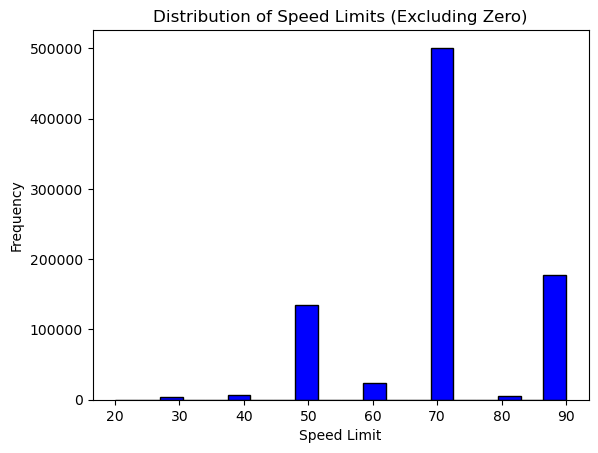

In [15]:
# Exclude zero values
non_zero_speed_limits = df_con[df_con['VEL_LIMITE'] != 0]['VEL_LIMITE']

# Identify the most common speed limit
most_common_speed_limit = non_zero_speed_limits.mode().values[0]

# Print the result
print(f"The most common speed limit, excluding zero, is: {most_common_speed_limit}")

# Plot histogram
plt.hist(non_zero_speed_limits, bins=20, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Speed Limit')
plt.ylabel('Frequency')
plt.title('Distribution of Speed Limits (Excluding Zero)')

# Show the plot
plt.show()

6. Create a new column called DIFFERENCE_KMH, calculated by subtracting the speed limit from the driver's speed at the time of the infraction. Use this to identify the top 10 drivers who exceeded the speed limits by the highest margins.


In [16]:
# Step 2: Create the 'DIFFERENCE_KMH' column
df_con['DIFFERENCE_KMH'] = df_con['VEL_CIRCULA'] - df_con['VEL_LIMITE']

# Step 3: Identify the top 10 drivers who exceeded speed limits by the highest margins
top_10_speeders = df_con.nlargest(10, 'DIFFERENCE_KMH')

# Display the result
top_10_speeders[['DENUNCIANTE', 'VEL_CIRCULA', 'VEL_LIMITE', 'DIFFERENCE_KMH']]

,DENUNCIANTE,VEL_CIRCULA,VEL_LIMITE,DIFFERENCE_KMH
24705,POLICIA MUNICIPAL,139,70,69
24704,POLICIA MUNICIPAL,135,70,65
217785,POLICIA MUNICIPAL,134,70,64
170061,POLICIA MUNICIPAL,132,70,62
170324,POLICIA MUNICIPAL,132,70,62
213518,POLICIA MUNICIPAL,132,70,62
134267,POLICIA MUNICIPAL,150,90,60
135356,POLICIA MUNICIPAL,150,90,60
170705,POLICIA MUNICIPAL,130,70,60
198935,POLICIA MUNICIPAL,150,90,60


7. Filter the dataframe for complaints that resulted in point deductions (other than zero points). Group this data by the public agent issuing the complaint. Which agent has the highest average points deduction?


In [17]:
points_deduction = df_con[df_con['PUNTOS'] != 0]
average_points_deduction = points_deduction.groupby('DENUNCIANTE')['PUNTOS'].mean().idxmax()
print("Agent with Highest Average Points Deduction:", average_points_deduction)

Agent with Highest Average Points Deduction: AGENTES DE MOVILIDAD


8. Remove the decimal part of the hours column and graphically represent the number of infractions for each hour. Identify the peak hours with the most infractions.


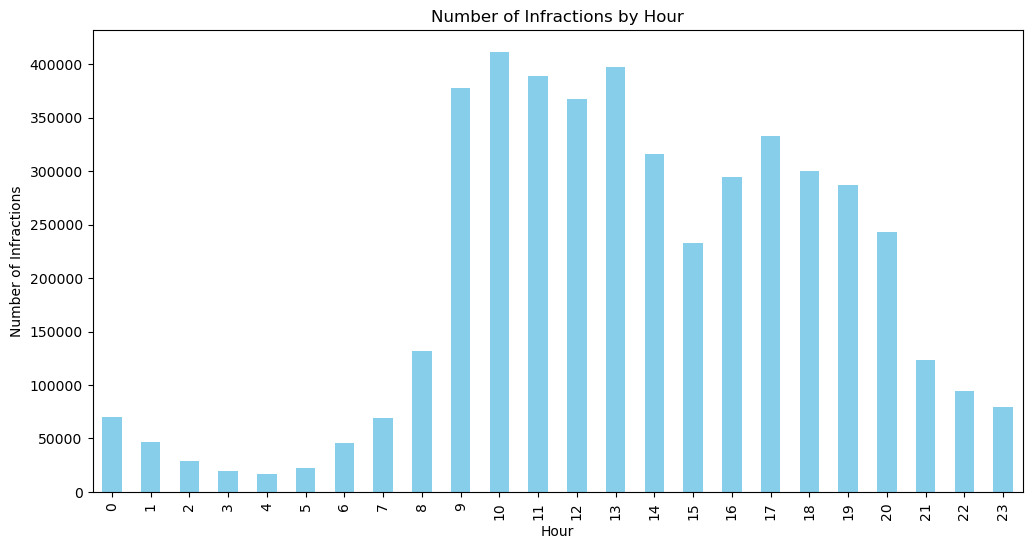

Peak Hours with the Most Infractions: 10


In [49]:
#Remove Decimal Part of Hours
df_con['HORA'] = df_con['HORA'].astype(int)
#Graphical Representation of Infractions by Hour
infractions_by_hour = df_con['HORA'].value_counts().sort_index()
#Identificar las horas pico con más infracciones
peak_hours = infractions_by_hour.idxmax()


#Gráfico de barras
plt.figure(figsize=(12, 6))
infractions_by_hour.plot(kind='bar', color='skyblue')
plt.title('Number of Infractions by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Infractions')
plt.show()

#Imprimir la hora pico con más infracciones
print("Peak Hours with the Most Infractions:", peak_hours)
dfc_2020 = df_con[df_con['ANIO'] == 2020]
dfc_2022 = df_con[df_con['ANIO'] == 2022]



9. Graphically display the fines issued during the months of the most recent full year available. Can any analysis be derived from this data? Compare it with the 2020 analysis to potentially predict the impact of Spain's COVID-19 confinement on traffic infractions.


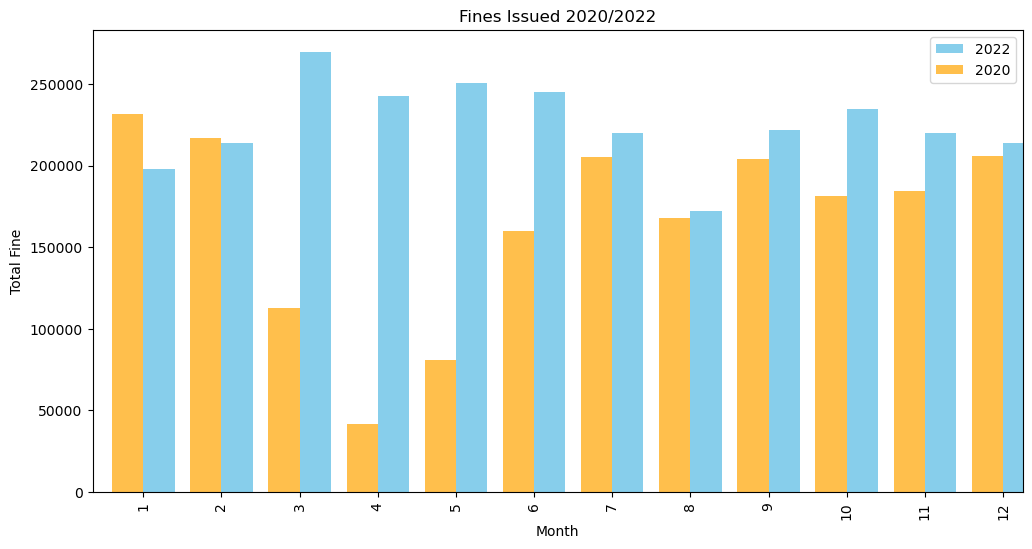

Percentage Change in Fines Issued:
MES
1     -14.606717
2      -1.458042
3     138.902476
4     478.073209
5     210.899463
6      53.189067
7       7.097651
8       2.615668
9       8.432137
10     29.534239
11     19.327540
12      3.911838
Name: count, dtype: float64


In [50]:
fines_by_2020 = dfc_2020['MES'].value_counts().sort_index()
fines_by_2022 = dfc_2022['MES'].value_counts().sort_index()
#Bar plot for fines per month of the most recent year
plt.figure(figsize=(12, 6))
fines_by_2022.plot(kind='bar', position = 0, width=0.4, color='skyblue', label='2022')
fines_by_2020.plot(kind='bar', position = 1, width=0.4, color='orange', alpha=0.7, label='2020')
plt.title('Fines Issued 2020/2022')
plt.xlabel('Month')
plt.ylabel('Total Fine')
plt.legend()
plt.show()

#Comparison between the most recent year and 2020
percentage_change = ((fines_by_2022- fines_by_2020) / fines_by_2020) * 100

print("Percentage Change in Fines Issued:")
print(percentage_change)

10. Display the number of infractions (without accumulated frequency) by each public agent, categorized by the infraction classification.

<Figure size 1400x800 with 0 Axes>

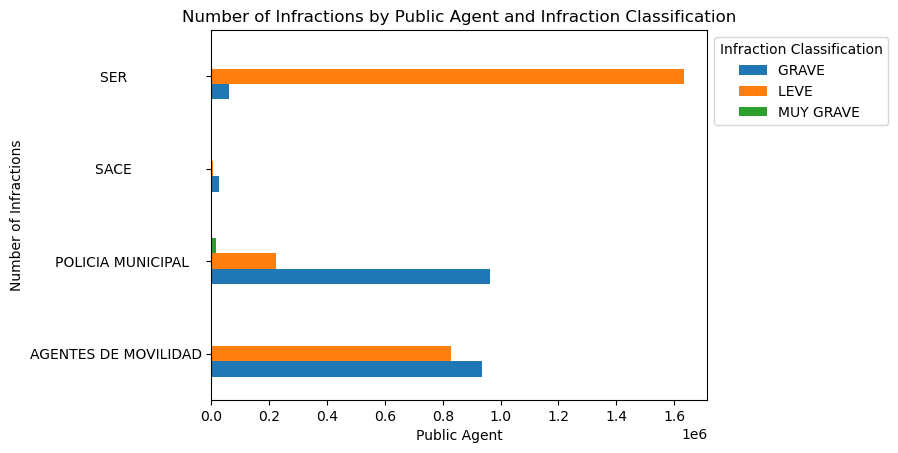

In [107]:
#Display the number of infractions by each public agent, categorized by infraction classification
infractions_by_agent = df_con.groupby(['DENUNCIANTE', 'CALIFICACION']).size().unstack()

#Bar plot for the number of infractions by each public agent, categorized by infraction classification
plt.figure(figsize=(14, 8))
infractions_by_agent.plot(kind='barh')
plt.title('Number of Infractions by Public Agent and Infraction Classification')
plt.xlabel('Public Agent')
plt.ylabel('Number of Infractions')
plt.legend(title='Infraction Classification', bbox_to_anchor=(1, 1))
plt.show()

11. Imagine landing a Junior Data Scientist role at a firm specializing in the comparative analysis of fines. Your boss, setting high standards, assigns you to conduct a comparative study between data from the most recent full year and the available 2020 records. You have the discretion to include additional data from other years if it enhances the analysis. Use relevant graphics to augment your analysis and weave an engaging narrative!


I. The code visualizes the top 20 locations with the highest traffic fines for the years 2020, 2021, and 2022 in three separate subplots, making it easier to compare between the years. Each subplot displays the locations on the y-axis and the number of fines on the x-axis.

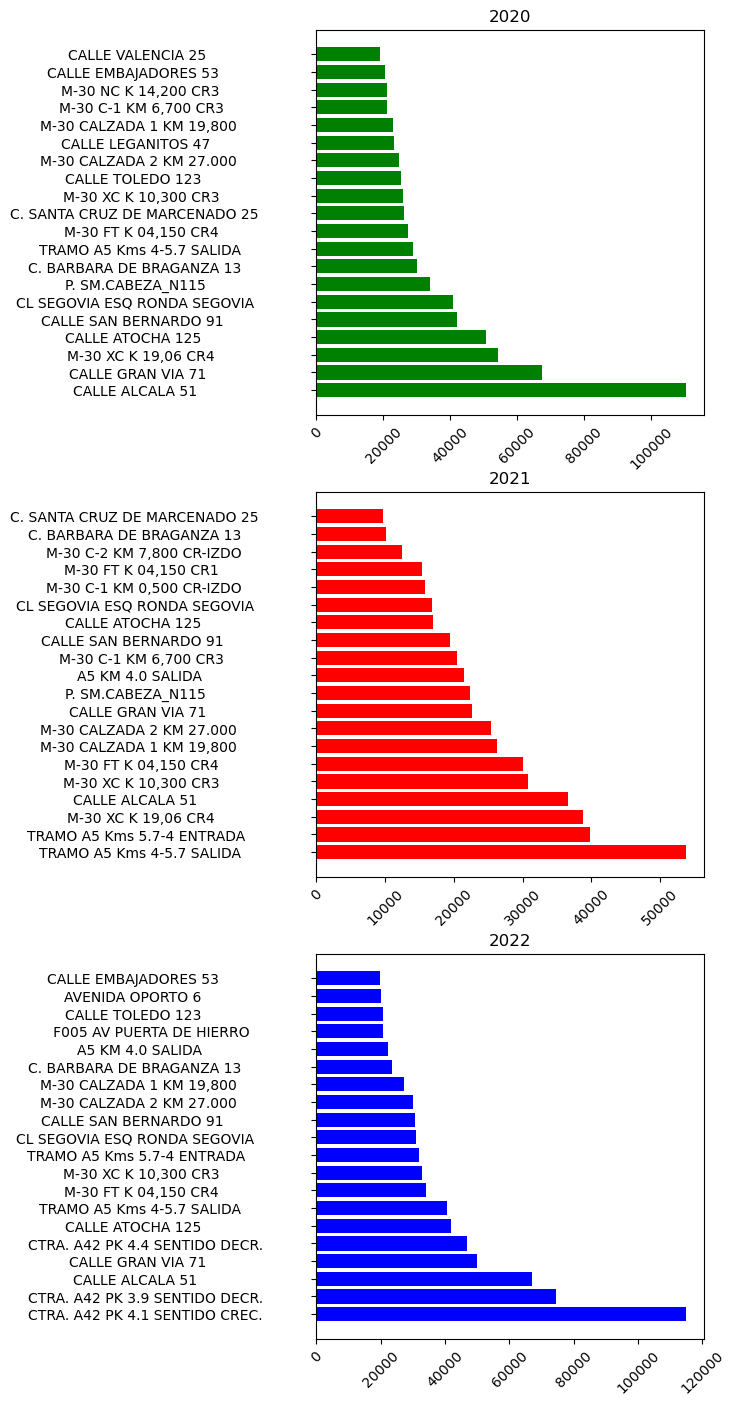

In [211]:

#Locating places with most fines by year
top_fines_2020 = df_21.loc[(df_21['ANIO'] == 2020)]['LUGAR'].value_counts().head(20)
top_fines_2020

top_fines_2021 = df_21.loc[(df_21['ANIO'] == 2021)]['LUGAR'].value_counts().head(20)
top_fines_2021

top_fines_2022 = df_21.loc[(df_21['ANIO'] == 2022)]['LUGAR'].value_counts().head(20)
top_fines_2022

#Creating three subplots
plt.subplots(3,1,figsize=(5,17))

# Subplot for 2020
plt.subplot(311)
plt.title('2020')
plt.barh(y=top_fines_2020.index,width=top_fines_2020, color= 'green')
plt.xticks(rotation=45)

# Subplot for 2021
plt.subplot(312)
plt.title('2021')
plt.barh(y=top_fines_2021.index,width=top_fines_2021, color='red')
plt.xticks(rotation=45)

# Subplot for 2022
plt.subplot(313)
plt.title('2022')
plt.barh(y=top_fines_2022.index,width=top_fines_2022, color = 'blue')
plt.xticks(rotation=45)
plt.show()

In [212]:
top_fines_2020.index.intersection(top_fines_2021.index).intersection(top_fines_2022.index)

Index(['CALLE ALCALA 51                         ',
       'CALLE GRAN VIA 71                       ',
       'CALLE ATOCHA 125                        ',
       'CALLE SAN BERNARDO 91                   ',
       'CL SEGOVIA ESQ RONDA SEGOVIA            ',
       'C. BARBARA DE BRAGANZA 13               ',
       'TRAMO A5 Kms 4-5.7 SALIDA               ',
       'M-30 FT K 04,150 CR4                    ',
       'M-30 XC K 10,300 CR3                    ',
       'M-30 CALZADA 2 KM 27.000                ',
       'M-30 CALZADA 1 KM 19,800                '],
      dtype='object', name='LUGAR')

In [213]:
def quit_spaces(string):
    """
    Remove leading and trailing spaces from a string.

    Parameters:
    - string (str): The input string.

    Returns:
    str: The input string with leading and trailing spaces removed.
    """
    return string.strip()


II. Identification and visualization of the most common types of traffic violations in prominent locations.

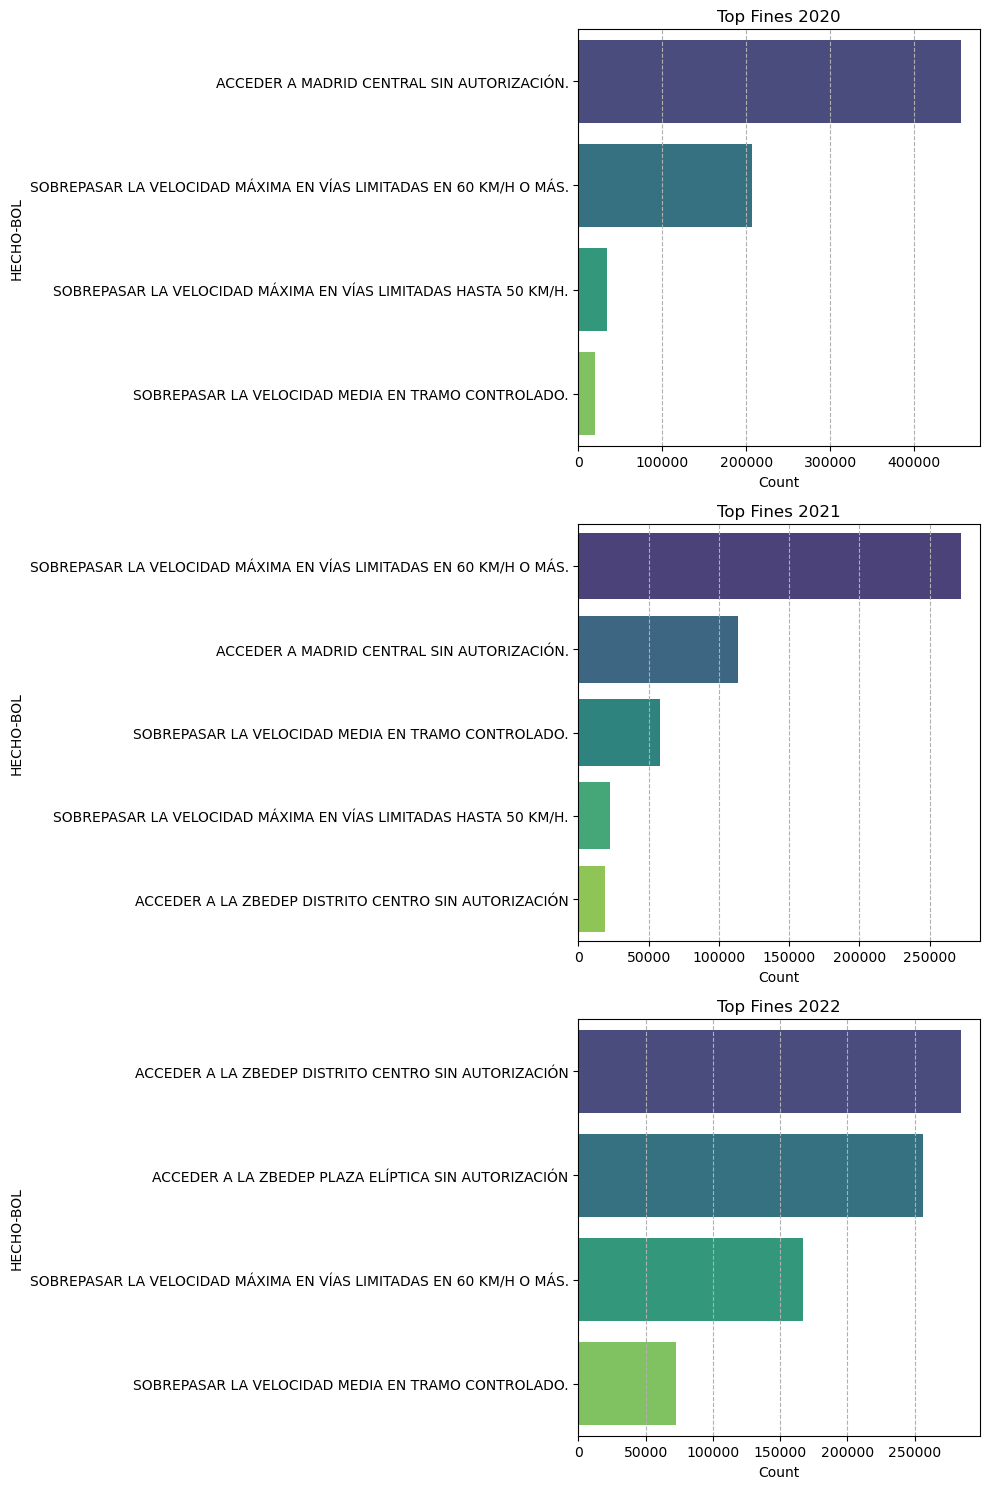

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming top_fines_2020, top_fines_2021, and top_fines_2022 are your DataFrames or Series

# Filter data for 2020
top_fine_types_2020 = df_21.loc[(df_21['ANIO'] == 2020) & (df_21['LUGAR'].isin(top_fines_2020.index))][['LUGAR', 'HECHO-BOL']]
top_fine_types_2020['HECHO-BOL'] = top_fine_types_2020['HECHO-BOL'].apply(quit_spaces)

# Filter data for 2021
top_fine_types_2021 = df_21.loc[(df_21['ANIO'] == 2021) & (df_21['LUGAR'].isin(top_fines_2021.index))][['LUGAR', 'HECHO-BOL']]
top_fine_types_2021['HECHO-BOL'] = top_fine_types_2021['HECHO-BOL'].apply(quit_spaces)

# Filter data for 2022
top_fine_types_2022 = df_21.loc[(df_21['ANIO'] == 2022) & (df_21['LUGAR'].isin(top_fines_2022.index))][['LUGAR', 'HECHO-BOL']]
top_fine_types_2022['HECHO-BOL'] = top_fine_types_2022['HECHO-BOL'].apply(quit_spaces)

# Create three subplots in a column
plt.subplots(3, 1, figsize=(10, 15))

# Subplot 1
plt.subplot(311)
sns.barplot(y=top_fine_types_2020['HECHO-BOL'].value_counts().index, x=top_fine_types_2020['HECHO-BOL'].value_counts(), palette='viridis')
plt.title('Top Fines 2020')
plt.xlabel('Count')
plt.ylabel('HECHO-BOL')
plt.grid(axis='x', linestyle='--')

# Subplot 2
plt.subplot(312)
sns.barplot(y=top_fine_types_2021['HECHO-BOL'].value_counts().index, x=top_fine_types_2021['HECHO-BOL'].value_counts(), palette='viridis')
plt.title('Top Fines 2021')
plt.xlabel('Count')
plt.ylabel('HECHO-BOL')
plt.grid(axis='x', linestyle='--')

# Subplot 3
plt.subplot(313)
sns.barplot(y=top_fine_types_2022['HECHO-BOL'].value_counts().index, x=top_fine_types_2022['HECHO-BOL'].value_counts(), palette='viridis')
plt.title('Top Fines 2022')
plt.xlabel('Count')
plt.ylabel('HECHO-BOL')
plt.grid(axis='x', linestyle='--')

plt.tight_layout()
plt.show()
